Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data acquisition

In [3]:
variabledef = pd.read_csv("http://bit.ly/VariableDefinitions",index_col=0)
variabledef.head()
Dataset = pd.read_csv("http://bit.ly/FinancialDataset",index_col=0)
Dataset.head()

,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,,,,,,,,,,,,
Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
Dataset = pd.read_csv("http://bit.ly/FinancialDataset", index_col=1)
Dataset['country'].head(10)

year
2018    Kenya
2018    Kenya
2018    Kenya
2018    Kenya
2018    Kenya
2018    Kenya
2018    Kenya
2018    Kenya
2018    Kenya
2018    Kenya
Name: country, dtype: object

In [5]:
Dataset.head(5)

,country,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
year,,,,,,,,,,,,
2018,Kenya,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2018,Kenya,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2018,Kenya,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
2018,Kenya,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
2018,Kenya,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Tidying the Dataset(missing data, outliers)

In [6]:
Dataset.describe()

,household_size,Respondent Age
count,23496.000000,23490.000000
mean,3.681818,38.804300
std,2.279933,16.519996
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 2018 to 2018
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   uniqueid                23524 non-null  object 
 2   Has a Bank account      23488 non-null  object 
 3   Type of Location        23509 non-null  object 
 4   Cell Phone Access       23513 non-null  object 
 5   household_size          23496 non-null  float64
 6   Respondent Age          23490 non-null  float64
 7   gender_of_respondent    23490 non-null  object 
 8   The relathip with head  23520 non-null  object 
 9   marital_status          23492 non-null  object 
 10  Level of Educuation     23495 non-null  object 
 11  Type of Job             23494 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.3+ MB


KeyError: ignored

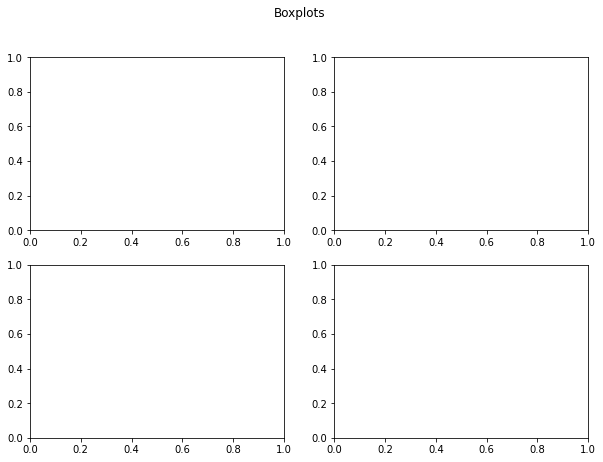

In [8]:
# Checking for Outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(Dataset['year'], ax=ax1)

sns.boxplot(Dataset['Respondent Age'], ax=ax2)
sns.boxplot(Dataset['household_size'], ax=ax3)
plt.show()


In [9]:
# Checking for Anomalies

q1_3, q3_3 = np.percentile(Dataset['year'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_3 - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)

print(iqr)

KeyError: ignored

year              165.195071
household_size      1.158154
Respondent Age      0.101108
dtype: float64

In [ ]:
# Dealing with the Missing Data
Dataset.isnull().sum()


year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

## Univariate analysis

In [ ]:
Dataset.tail(1)

,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,,,,,,,,,,,,
Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


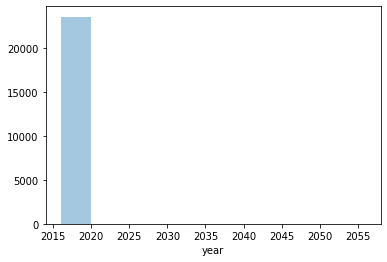

In [ ]:
sns.distplot(Dataset['year'].dropna(), kde=False, bins = 10)

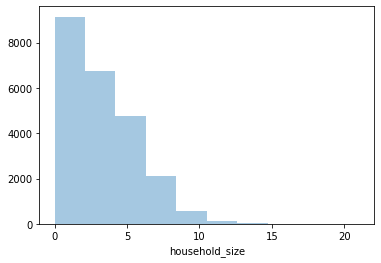

In [ ]:
sns.distplot(Dataset.household_size.dropna(), kde=False, bins = 10);

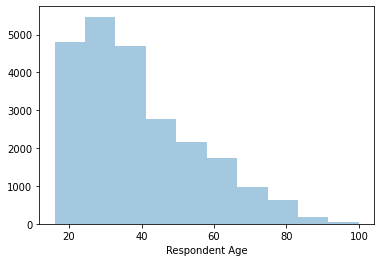

In [ ]:
sns.distplot(Dataset['Respondent Age'].dropna(), kde=False, bins = 10)

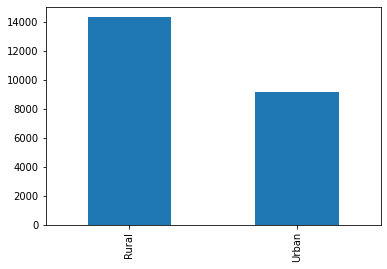

In [ ]:
Dataset['Type of Location'].value_counts().head(10).plot.bar()

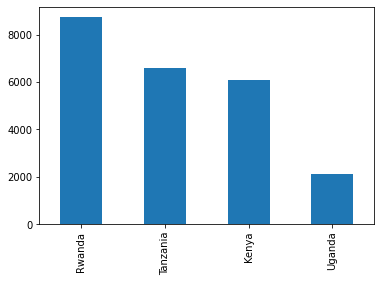

In [ ]:
Dataset['country'].value_counts().head(10).plot.bar()

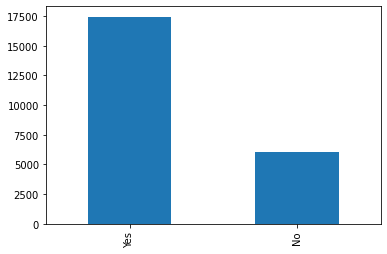

In [ ]:
Dataset['Cell Phone Access'].value_counts().head(10).plot.bar()

In [ ]:
Dataset['Type of Location'].value_counts().head(10).plot.bar()

NameError: ignored

In [ ]:
Dataset['Type of Location'].value_counts().head(10).plot.bar()

In [ ]:
sns.distplot(vg_df.Critic_Score.dropna());

In [ ]:
#  categorical variables is with a frequency table. To visualize we will use a bar chart.

sns.countplot(x='Has a Bank account', data='Dataset')
plt.title('Number of Superheros by Publisher')
plt.ylabel('Number of Superheros')
plt.xlabel('Publisher')
plt.xticks(rotation = 90)
plt.show();

Bivariate analysis (box plot, scatter plots, etc)

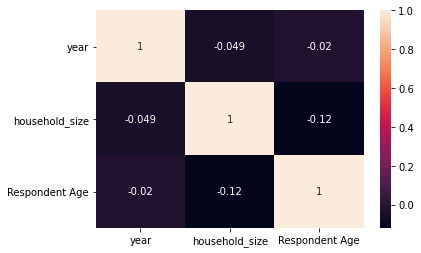

In [ ]:
sns.heatmap(Dataset.corr(),annot=True)
plt.show()

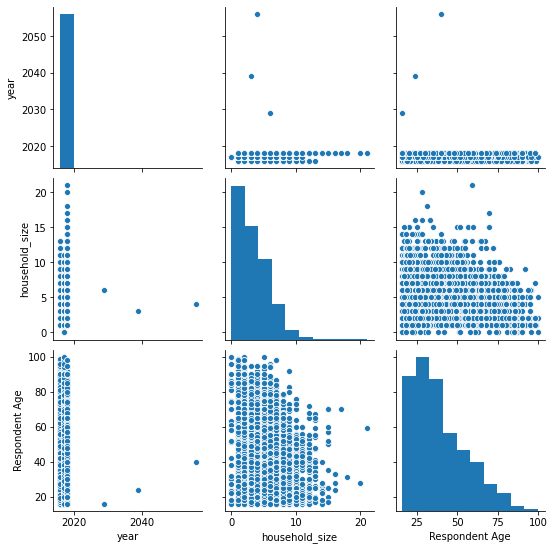

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(Dataset)
plt.show()

In [ ]:
# Plotting our scatterplot
plt.scatter(iris_df['mpg'], iris_df['weight'])

# Giving our scatterplot a title
plt.title('MPG vs Weight')

# Labelling our x axis
plt.xlabel('MPG')

# Labelling our y axis
plt.ylabel('Weight')

# Displaying our scatterplot
plt.show()

Multivariate analysis 

In [11]:
# PCA

y = Dataset['Has a Bank account']
X = Dataset.drop('Has a Bank account', 1)

In [ ]:
y.head()


country
Kenya    Yes
Kenya     No
Kenya    Yes
Kenya     No
Kenya     No
Name: Has a Bank account, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# Step 5: Normalization
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: ignored

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

NameError: ignored

In [13]:
# Step 7: Explained Variance Ratio
#
explained_variance = pca.explained_variance_ratio_

explained_variance

NameError: ignored

In [15]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

NameError: ignored

In [16]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

NameError: ignored